<div align="center">
    <h1> <b>MO416 - IC/Unicamp  </h1>
    <h2> <b>Projeto 2 - Comparativo de Abordagem Sexuada e Assexuada de Algoritmos Genéticos na Maximização de Função: aplicação em cenário hospitalar </h2>
</div>

<table>
<tr><td style="text-align:left">Christian Maekawa</td>  <td>231867</td>  </tr>
<tr><td style="text-align:left">Giovane de Morais</td>  <td>192683</td>  </tr>
<tr><td style="text-align:left">Maisa Silva      </td>  <td>181831</td>  </tr>
<tr><td style="text-align:left">Matteus Vargas   </td>  <td>262885</td>  </tr>
<tr><td style="text-align:left">Stéfani Fernandes</td>  <td>147939</td>  </tr>
</table>

# 1. Algoritmos Genéticos

Algoritmos genéticos tem como base a teoria da evolução das espécies por seleção natural de *Charles Darwin*. O mesmo afirmou que os organismos com maiores chances de sobrevivência são os mais adaptados aos desafios ambientais que está inserido. Este indivíduo, por consequência, gerará um número maior de descendentes que os menos favorecidos, o que se caracteriza por uma espécie de "seleção" do meio aos conjunto de indivíduos de uma população. 

A seleção descrita por Darwin obedece determinados critérios como: os indivíduos de uma mesma espécie não são idênticos entre si; todo indivíduo tem capacidade de reprodução, e de receber mutações, porém o sucesso da descendência será determinada pela adaptabilidade ao ambiente de acordo com as variações genéticas mais vantajosas. 

- **Cromossomo / Indivíduo**: Sequência de informações que resolve ou se aproxima da resolução do problema.
- **Gene**: Informação unitária que compõe o indivíduo.
- **População**: Qualquer grupo de indivíduos que leva (ou vai levar) as informações de cromossomos que serão estudados pelo Algoritmo Genético.
- **Geração**: Nova população gerada por uma execução do Algoritmo Genético.
- **Mutação**: quaisquer alterações “não sexuadas” no cromossomo que sejam transferidas à próxima geração podendo, ou não, causar alterações na população.
- **Crossover**: quaisquer alterações “sexuadas” (troca de informações entre individuos) no cromossomo que sejam transferidas à próxima geração podendo, ou não, causar alterações na população.
- **Parâmetros**: quaisquer informações utilizadas para definir os objetivos da evolução.
- **Fitness**: Cálculo da aptidão de indivíduo. Métrica que define quão "evoluido" um indivíduo está em relação ao objetivo, o quanto ele foi otimizado em relação aos demais da população.
- **Otimização**: processo de execução da evolução da população, através de regras pré definidas, com o objetivo de atingir, ou pelo menos se aproximar, um parâmetro "ideal". Uma das formas mais comuns de se realizar uma otimização é através da descrição do ambiente de uma ou mais funções matemáticas onde a otimização tem como objetivo busca minimizar ou maximizar as mesmas através da escolha sistemática dos valores de variáveis reais ou inteiras dentro de um conjunto viável.


# 2. Problemática

Matias Vargas Maekawa Fernandes Moraes e Silva (MVMFMS) é diretor de um hospital que visa atender o máximo de pacientes possível em sua unidade hospitalar. Para isso, ele precisa saber quantos funcionários ele deverá contratar e qual o seu ganho com isso, representado pelo máximo de pacientes atendidos por hora. A sua equipe de T.I. projetou uma solução que toma a quantidade de recepcionistas, técnicos, médicos, enfermeiras na sala de tratamento e enfermeiras na sala de emergência, sendo representadas respectivamente pelas variáveis x1, x2, x3, x4, x5.

Em cima disso, a T.I. de MVMFMS desenvolveu um metamodelo, baseado em redes neurais, que permite a obtenção de um padrão matemático que retrata o modelo de simulação, permitindo assim, a otimização deste modelo matemático, de forma mais rápida que a utilização de um otimizador em conjunto a um simulador a eventos discretos, porque estamos minimizando o tempo gasto com simulações usando o metamodelo e encontrando o máximo usando algoritmos genéticos (AG) para maximizar nosso objetivo.

Primeiro, o modelo que se pretende otimizar é utilizado para gerar um conjunto de dados que contenha a variável de saída que se pretende otimizar. Posteriormente, com auxílio de técnicas de metamodelagem, especificamente aqui redes neurais, o metamodelo é gerado. Mas ainda fica a pergunta, quais seriam os melhores valores para tais variáveis para alcançar-se o melhor resultado possível desse metamodelo? Aí entra o AG que busca fazer esse tipo de otimização e passar uma informação clara e segura para MVMFMS de quantos funcionários ele deve contratar e o seu ganho real.

A proposta deste projeto é prever o número de funcionários necessários para cobrir a área afetada com doença para prever o número de pacientes que podemos curar (y). Foi necessário encontrar o número de funcionários (x1, x2, x3, x4, x5) para maximizar esse número e cobrir a região afetada com sucesso. Maximizar todos os parâmetros não é uma solução TOTAL, pois o funcionário tem dependências entre si e precisamos evitar despesas desnecessárias com funcionários extras, tempo ocioso e gargalo, se possível. Por exemplo, muitos recepcionistas para poucos médicos, gera muita espera. Por outro lado, muitos médicos para poucos recepcionistas, fica médico ocioso, e médico custa caro.

Embora o projeto tenha forte relação com a simulação, o escopo aqui é o AG. O projeto usa um conjunto de dados que foi gerado a partir de [1] que simula uma simulação de modelo hospitalar. A descrição sobre como modelar um hospital simulado foi obtida em outro artigo sobre como criar um hospital simulado [2]. Então, eles geram os dados que usamos para criar um metamodelo. Sobre a criação do metamodelo usando redes neurais artificiais com python. O metamodelo é uma meta-representação do modelo real; toda a reprodução foi comparada com os resultados obtidos nos artigos.

Está fora do escopo explorar sobre simulação e metamodelo de software. Todas as configurações foram obtidas da literatura e tentaram se reproduzir o cenário mais próximo possível. O foco deste projeto é sobre o AG. Assim, foi utilizada a saída da rede artificial como função de adequação e aplicada muitas configurações para encontrar solução e compartilhar sobre descobertas. Outros artigos não exploram profundamente os resultados obtidos com algoritmos genéticos.

Contudo houve um conflito dentro da equipe de MVMFMS. Uma parte do time acha que deve ser feita a abordagem clássica de um AG, com **fitness**, **seleção dos melhores**, **crossover** e **mutação** e outra parte acha que seria melhor seguir por uma linha diferente usando uma abordagem **assexuada**, uma ideia surgida após diversos debates, que consiste em etapas semelhantes às supracitadas, contudo sem crossover, já que há apenas um pai, mas com muita força na **mutação**. Ambos foram implementados e agora é hora de apresentar para MVMFMS para que o mesmo escolha.

## 2.1. Objetivo

Encontre o número de funcionários necessários para maximizar o número de pacientes atendidos.

## 2.2. O modelo evolutivo adotado

Existem dois modelos evolutivos com cruzamento sexual e outro com assexual, auto-reprodução.

### 2.2.1. Especificidades e restrições de implementação

Cada variável pode assumir apenas um conjunto de valores, que ficam entre o limite inferior e superior de cada um deles, como mostrado na tabela abaixo:

|Representação | Variáveis de decisão | tipo | Limite inferior | Limite superior |
|:-------------|:-------------------------------------------:|:-------:|:----------------:|---------------:|
|x1            | Número de recepcionistas                     | Integer |        1         |       3        |
|x2            | Número de doutores                           | Integer |        1         |       4        |
|x3            | Número de técnicos de laboratório            | Integer |        1         |       5        |
|x4            | Número de enfermeiras na sala de tratamento      | Integer |        1         |       6        |
|x5            | Número de enfermeiras na sala de emergencia      | Integer |        1         |       12       |

Portanto, as operações que manipulam tais valores, devem respeitar a regra acima.

### 2.2.2. Variações nos parâmetros

#### 2.2.2.1. Função de aptidão adotada

- Equação matemática do metamodelo gerada pela programação genética $ y1 = 1.113x_ {2} + 0.701x_ {2} x_ {3} + 0.207x_ {2} x_ {5} + 0.021x_ {1} x_ {5} - 0.435x_ {2} ^ {2} - 0,013x_ {2} x_ {5} ^ {2} - 0,092 x_ {2} x_ {3} ^ {2} $.

### 2.2.3 Os critérios de avaliação são:

* tamanho da população
* critérios de parada
* técnica de seleção
* técnica de crossover
* técnica de mutação
* método de substituição
* taxa de mutação
* taxa de crossover

Os critérios de avaliação são a base para o desenvolvimento dos AG's.

# 3. Implementação

A equipe de T.I. de MVMFMS seguiram por duas abordagens diferenciadas: a implementação **"Clássica**" e a **"Assexuada"**. Apesar de caminharem para o mesmo objetivo, ambos tem diferenças na forma de implementar. Entretanto, todos seguem os mesmos preceitos de avaliação:

* tamanho da população
* critérios de parada
* técnica de seleção
* técnica de crossover
* técnica de mutação
* método de substituição
* taxa de mutação
* taxa de crossover

As subseções a seguir irão descrever melhor o funcionamento de ambas as implementações.

## 3.1. Metamodelo

Antes de iniciar a descrição dos AG's propriamente ditos, iniciaremos rapidamente com o metamodelo. 

Tudo se inicia com a coleta de dados. Os mesmos foram disponibilizados por Miranda (2015). A opção por pegar dados dessa fonte é pelo fato do mesmo serem reais, tornando a solução AG factível para ser aplicado em situações realísticas. 

O metamodelo foi elaborado como um ANN (Artificial Neural Networks) com 5 neurônios e usando sigmoid como função de ativação. Ele faz a leitura dos dados, o tratamento de entrada e saída para melhor correlacionar igualmente uma variável com outra, logo depois é realizado o back-propagation. Na sequência é definida uma função de ativação, o algoritmo então separa uma parcela dos dados para treinamento e outra para validação, passando depois para as etapas de aprendizado e validação do metamodelo. 

Metamodelo apresentado, é interessante, avaliá-lo primeiramente para sabermos se ele é, ou não, útil no decorrer do projeto:

Executando com o dataset disponibilizado, inicialmente, não podemos ver correlação entre variáveis:

![correlacao.png](img/metamodelo/correlacao.png)

Ao visualizar a distribuição, podemos ver que algumas distribuições são equilibradas, outras não.

![distribuicao.png](img/metamodelo/distribuicao.png)

Por fim, esse conjunto de dados converge nosso metamodelo:

![performance.png](img/metamodelo/performance.png)



# 3.2. Abordagem Sexuada

A abordagem sexuada segue o seguinte roteiro de execução:

* É determinada uma quantidade de gerações
* Submeta cada população do cromossomo à avaliação de fitness
* Selecione os pais, de acordo com os critérios estabelecidos
* Faça o crossover
* Submeta a mutação
* Reinicie o processo até se esgotarem o número de gerações

Sua representação em código está abaixo:

In [ ]:
M = Número de gerações

for i in range(M):
    geracoes.append(i) # Lista de gerações
    fitness_score() # Submissão de cada cromossomo à função de fitness
    selectparent() # Seleção de pais 
    crossover(corte) # Execução do crossover
    mutation(taxa_mutacao) # Aplicação da mutação
    uso_recursos() # Avalia o uso de recursos do sistema

É curioso notar que, nesse problema, a quantidade de **gerações** pode ser determinada no começo, sendo esse o **CRITÉRIO DE PARADA** do algoritmo, quando ele terminar de executar TODAS as suas gerações estabelecidas. Há algumas formas de se pensar nisso. O motivo de ter escolhido essa abordagem é pelo fato de não se saber ao certo qual seria a otimização *PERFEITA*, ou seja, a maior quantidade de pacientes possível. Trabalhamos então com uma estimativa.
Portanto, segue-se para essa ideia de conseguir o maior número de pacientes, e otimizar as variáveis, dentro da quantidade de gerações estabelecida no começo da execução.

O contrário também seria possível, que seria determinar um valor ideal a se alcançar e, enquanto não chegar lá, instancia-se uma nova geração, mas a abordagem escolhida aqui foi a primeira.

Por ser um valor parametrizável, é possível testar a solução em função do **número de gerações**. Isso será melhor abordado na seção de **Experimentos**.

Estabelecida a forma de loop (definição do número de gerações), a execução começa de fato. A abordagem *sexuada* se inicia com a definição do **TAMANHO DA POPULAÇÃO** que será trabalhada a fim de alcançar os objetivos finais de otimização de variáveis e entregar o número de pacientes atendidos por hora. 

São instanciados **quatro** cromossomos com **cinco** genes cada, onde cada gene representa uma variável que se busca otimizar:

In [ ]:
populations = [[3, 1, 3, 3, 10], [1, 3, 5, 2, 9], [2, 2, 3, 4, 12], [3, 2, 5, 6, 5]] # População inicial 
                                                                                     # e seus respectivos valores

# Mapeamento dos genes em função das variáveis que se busca otimizar

# [3, 1, 3, 3, 10], [1, 3, 5, 2, 9], [2, 2, 3, 4, 12], [3, 2, 5, 6, 5]
#  x1 x2 x3 x4 x5    x1 x2 x3 x4 x5   x1 x2 x3 x4 x5   x1 x2 x3 x4 x5    

Pelo fato da solução trazer interação com o usuário, há uma opção onde o usuário pode mandar gerar uma população aleatória. Caso isso aconteça, é estritamente necessário manter as regras dos limites superiores e inferiores. Por isso, a população inicial é submetida ao seu primeiro ajuste, antes mesmo de começar as operações genéticas. 
Esse ajuste é para caso uma variável esteja com valor incorreto para sua posição.

Exemplo de situação **ERRADA**:

populations = [3, 1, 3, 3, 10], [1, 3, 5, 2, 9], [2, 2, **12**, 4, 12], [**10**, 2, 5, 6, 5]

Os valores em destaque estão **errados**, então devem ser submetidos à correções. Essa correção se chama **ajusta_populacao**, cujo código é esse:

In [0]:
# O ajuste aqui serve para corrigir falhas que possa ter ocorrido na criação
# da população inicial, em função dos limites superiores de cada variável
def ajusta_populacao(populations):
    for i in range(4):
        for x in range(5):
            # Para cada gene, confere se o seus limites estão de acordo. Se não, mude o valor
            if (x == 0 and (populations[i][x] not in range(1, 3))):
                populations[i][x] = random.randint(1, 3)
            if (x == 1 and (populations[i][x] not in range(1, 4))):
                populations[i][x] = random.randint(2, 4)
            if (x == 2 and (populations[i][x] not in range(1, 5))):
                populations[i][x] = random.randint(3, 5)
            if (x == 3 and (populations[i][x] not in range(1, 6))):
                populations[i][x] = random.randint(4, 6)
            if (x == 4 and (populations[i][x] not in range(1, 12))):
                populations[i][x] = random.randint(10, 12)

Esse tipo de situação ocorre apenas com a população inicial na geração *0*, já que o crossover e a mutação não permitem que isso volte a se repetir. Essa regra ainda será muito importante.

Uma vez definido um ponto de partida e objetivos para a população, é necessário iniciar um processo evolutivo que, a nível de AG, basicamente se trata da execução de uma ou várias vezes do mesmo, onde a cada rodada é criada uma geração descendente direta de indivíduos. As regras cujo o algoritmo será executado são chamadas de funções de objetivo ou **fitness**.

## 3.2.1. Fitness

O **fitness_score** é a primeira operação genética realizada aqui:

In [ ]:
M = Número de gerações

for i in range(M):
    geracoes.append(i)
    fitness_score() <---- 
    selectparent() 
    crossover(corte)
    mutation(taxa_mutacao)
    uso_recursos()

Esse procedimento pega cada **cromossomo** da população e o submete à operação de **predict** (predição) do metamodelo. Essa operação retorna um número *float*. Esse número representa aquilo que almejamos, a quantidade de pacientes atendidos por hora, com aquele cromossomo.
Terminado de avaliar a população toda, a mesma deve ser **ordenada** em função dos resultados de *fitness*.

Dessa maneira, os melhores cromossomos ficam nas primeiras posições, e os piores ficam nas últimas. Essa ordenação será base para seleção dos pais no crossover.
Para fins de avaliação no final, o melhor cromossomo, junto com o seu respectivo valor de fitness, não são esquecidos. Eles são armazenados até o fim de todas as gerações, ou seja, para cada geração é eleito um **campeão**

Essa **TÉCNICA DE SELEÇÃO** é o chamado **RANKING**, onde os melhores serão os pais.

In [1]:
def fitness_score():
    global populations, best
    fit_value = [] # Guardam-se os valores de fitness da população
    for i in range(len(populations)): # Percorre toda a população
        fit_value.append(test.predict(populations[i])) # Submete cada cromossomo à avaliação. Os seus resultados são guardados na lista
    fit_value, populations = zip(*sorted(zip(fit_value, populations), reverse=True)) # Os cromossomos são ordenados, do melhor para o pior, em função dos seus resultados da avaliação de fitness
    best = fit_value[0] # Eleito o campeão da geração
    melhores.append(best) # Vai para lista de campeões


Agora, se não houver quaisquer modificações nos indivíduos, as gerações subsequentes serão exatamente como a inicial. A adição de mecanismos de "variabilidade genética" de informações é crucial para a evolução da população. Voltando os olhos para a genética evolutiva de Darwin, compreendemos que é possível obtê-lo através de duas situações: **crossover** e **mutação**.

## 3.2.2. Crossover

Crossover, é o processo onde ocorre a troca de informações entre indivíduos de uma população. Na biologia este processo é o mecanismo chave na reprodução sexuada, onde dois ou mais indivíduos enviam, recebem ou trocam material genético, sendo responsável pela variabilidade genética. É valido ressaltar que para que o crossover seja efetivo os indivíduos devem ser estruturalmente idênticos.
Aqui, pegam-se os dois melhores e os transforam em pais da próxima geração, onde o filho recebe duas partes do cromossomo, uma vinda da **mãe** e outra do **pai**.

In [ ]:
M = Número de gerações

for i in range(M):
    geracoes.append(i)
    fitness_score() 
    selectparent() <---- 
    crossover(corte)
    mutation(taxa_mutacao)
    uso_recursos()

O processo de crossover inicia-se imediatamente após a avaliação de fitness. Primeiro, selecionam-se os pais, através da operação **selectparent**. Esse procedimento captura os dois melhores cromossomos da população (ordenada) e os elege como pais. 

Por ser algo obrigatório, a **TAXA DE CROSSOVER** é de ~1, já que é certo que os dois melhores cromossomos irão cruzar sendo então, obrigatoriamente, pais nessa geração. Contudo, como será descrito em seguida, eles não gerarão tantos filhos assim.

In [ ]:
def selectparent():
    global parents
    # global populations , parents
    parents = populations[0:2] # São eleitos como pais os dois melhores da geração

Pais selecionados, iniciar-se-á o procedimento de crossover:

In [ ]:
M = Número de gerações

for i in range(M):
    geracoes.append(i)
    fitness_score() 
    selectparent() 
    crossover(corte) <---- 
    mutation(taxa_mutacao)

Para criar descendentes, existem algumas **TÉCNICAS DE CROSSOVER**, como um crossover de ponto único, crossover de dois ou vários pontos. A **técnica de crossover** adotada aqui é o *crossover de ponto único* (em inglês, *Single Point*).

Para um **crossover de ponto único**, primeiro precisamos selecionar um ponto e depois trocar essas partes divididas por esse ponto entre os cromossomos pais para criar filhos. 

![crossover.png](img/crossover/crossover.png)

No código:

In [0]:
def crossover(corte):
    global parents
    cross_point = corte
    parents = parents + tuple([(parents[0][0:cross_point + 1] + parents[1][cross_point + 1:6])])
    parents = parents + tuple([(parents[1][0:cross_point + 1] + parents[0][cross_point + 1:6])])

Por conta dessa técnica, o procedimento de crossover recebe como parâmetro um valor chamado *corte*. Esse *corte* é o ponto onde será feito crossover. Na estratégia deste projeto, podem ser valores de 0~4, que corresponde a cada um dos genes no cromossomo (em termos de programação, corresponde as posições no vetor).

Uma vez identificado o ponto de corte, tudo o que vier depois desse ponto será permutado entre os pais, gerando dois filhos. Abaixo um exemplo prático para ficar mais claro:

corte = 1 (posição 1 no vetor)

mae = [1 3|**5 2 9**]

pai  = [2 2|**3 4 12**]

filho1 = [1 3|**3 4 12**]

filho2 = [2 2|**5 2 9**]

nova_populacao = [1, 3, 5, 2, 9], [2, 2, 3, 4, 12], [**1, 3, 3, 4, 12**], [**2, 2, 5, 2, 9**]

Algo a ser notado aqui é, por qual motivo foram gerados apenas dois filhos e não quatro e, ainda por cima, repetem-se os pais para a nova população?

O motivo é que aqui é aplicado o **MÉTODO DE SUBSTITUIÇÃO** chamado *Estado Uniforme*, que consiste em levar os melhores da população corrente, substituindo apenas os piores pelos filhos dos melhores.
Diferentemente da abordagem **ELITISTA**, aqui o tamanho da população não se expande, já que apenas os piores são substituídos. Não deixa de ser uma forma de **ELITISMO**, mas com características próprias.

## 3.2.3. Mutação

Mutação é uma alteração, natural ou artificial, que ocorre na sequencia de informação que forma cada indivíduo, não sendo obrigatória o contato do indivíduo com outros de sua população para sofrer tais alterações. Cabe a ressalva que as mutações podem ser boas (aproximam o indivíduo do ótimo ideal), ruins (afastam o indivíduo do ótimo ideal) ou neutras (mantêm o indivíduo no mesmo estado).

In [ ]:
M = Número de gerações

for i in range(M):
    geracoes.append(i)
    fitness_score() 
    selectparent() 
    crossover(corte)
    mutation(taxa_mutacao) <---- 

Aqui, é aplicada uma **chance** de mutação, conhecido também como **TAXA DE MUTAÇÂO**, então pode acontecer de não haver mutações em determinadas gerações.
É passado por parâmetro esse valor da taxa de mutação. É gerado um valor entre 0~100 (que corresponde à 0 e 100%) e comparado com essa taxa de mutação. Se forem iguais, o processo de mutação ocorrerá. Senão, essa geração não haverá mutação alguma.

A **TÉCNICA DE MUTAÇÃO** empregada aqui foi elaborada especificamente para este problema. Primeiramente, escolhe-se um determinado gene arbitrariamente. Em seguida, passa pela regra dos limites superiores e inferiores, de forma obrigatória. Isso significa que, um determinado gene selecionado, mesmo estando com o seu valor dentro do limite correto, o mesmo será alterado:

In [0]:
def mutation(taxa_mutacao):
    global populations, parents
    mute = random.randint(0, 100) # Chance de mutação
    if mute == taxa_mutacao: # Compara com a taxa
        # Escolhe o gene que passará por mutação
        x = random.randint(0, 3) 
        y = random.randint(0, 4)
        # Aplicam-se as regras dos limites inferiores e superiores
        if (y == 0):
            parents[x][y] = random.randint(1, 3)
        if (y == 1):
            parents[x][y] = random.randint(1, 4)
        if (y == 2):
            parents[x][y] = random.randint(1, 5)
        if (y == 3):
            parents[x][y] = random.randint(1, 6)
        if (y == 4):
            parents[x][y] = random.randint(1, 12)
    
    # Gera a população da nova geração
    populations = parents

Reinicia-se o processo até terminar as gerações. 

Terminado, retorna-se o valor da melhor solução e o seu respectivo cromossomo:

In [ ]:
print()
    bests, melhores_crom = zip(*sorted(zip(melhores, melhores_cromossomos), reverse=True))
    print(f"Melhor resultado : {bests[0]}")
    print()
    print(f"Melhor Cromossomo : {melhores_crom[0]}")
    print()

# 3.3. Abordagem Assexuada

Na abordagem assexuada os indivíduos da geração seguinte são gerados por um único pai, através de mudança dos genes do melhor indíviduo da geração anterior. As etapas iniciais são muito semelhantes à abordagem sexuada, entretanto, nessa implementação, é explorada com muita força a mutação de indivíduos, já que aqui o crossover é desprezado, quando ocorre estabilização do desempenho das gerações, e assim não estacionar o algoritmo em um máximo local, já que o risco de **clones**, simplesmente, é real. 

Espera-se que a abordagem assexuada implementada tenha um melhor desempenho que a sexuada, pois têm maior possibilidade de atingir um máximo global, já que as gerações posteriores serão fortemente descentes do melhor pai da geração 0.

In [0]:
def agOptim(self, fitness, with_plot=False):
    M = 2000  # Numero de geração
    
    def cromo(s0):
            """ Separa cromossomo em 5 partes"""
            vet = []
            vet.append(s0[0:4])
            vet.append(s0[4:8])
            vet.append(s0[8:12])
            vet.append(s0[12:16])
            vet.append(s0[16:])
            return vet

        for i in range(M):
            cromosome = []  # Guarda os cromossomos com crossover
            fit = []  # Guarda saída da função objetiva
            
            for j in range(len(s0) // 2 + 1):  # Rotaciona até dar uma volta completa
                v = cromo(s0.copy())  # quebra em quatro partes
                temp_max = fitness(v[0], v[1], v[2], v[3], v[4])  # Retorna a função fitness
                fit.append(temp_max)  # guarda resultado fitness
                cromosome.append(s0.copy())  # guarda o cromossomo
                
                if (np.min(temp_max) < 0) | (np.median(fit) == np.max(fit)):
                    # aplica mutacao para evitar função obj negativa e cromossomo repetido
                    pos = np.random.randint(4)  # Escolhe uma das 5 variáveis
                    np.random.shuffle(
                        v[pos]
                    )  # Embaralha os bits de umas da variável (muda numero)
                s0 = (
                        list(v[0]) + list(v[1]) + list(v[2]) + list(v[3]) + list(v[4])
                )  # junta partes
                s0 = np.roll(s0, -2)  # Gera novos indiduo com mesmo cromossomo
            score.append(np.max(fit))  # Armazena a melhor resultado da geracao
            score_fit.append(cromosome[np.argmax(fit)])  # Armazena o melhor cromossomo
            if np.median(score) == np.max(
                    fit
            ):  # Se resultado eh repetido (moda dos resultados obtidos)
                s0 = cromosome[
                    np.random.randint(len(fit))
                ]  # pega outro cromossomo diferente para self.explorar outro espaco
            else:
                s0 = cromosome[np.argmax(fit)]  # Pega o melhor resultado
            uso_recursos(self)

        best = score_fit[np.argmax(score)]  # pega melhor cromossomo
        best_varb = cromo(best)  # quebra em 5 variaveis binaria
        best_value = fitness(
            best_varb[0], best_varb[1], best_varb[2], best_varb[3], best_varb[4]
        )  # Converte para funcao fitness para decimal
        best_var = [
            self.fc(best_varb[0], self.exp, 0).astype(int),
            self.fc(best_varb[1], self.exp, 1).astype(int),
            self.fc(best_varb[2], self.exp, 2).astype(int),
            self.fc(best_varb[3], self.exp, 3).astype(int),
            self.fc(best_varb[4], self.exp, 4).astype(int),
        ]  # Converte em 5 variaveis
        print(
            f"Best value: {best_value} best cromosome {best} best combination of variables {best_var}"
        )
    

# 4 - Experimentos

Com o metamodelo instanciado e devidamente treinado e passada as suas avaliações específicas, vem então a execução dos AG's.
Lembrando sempre de seguir a regra dos limites superiores de cada variável:

|Representação | Variáveis de decisão                          | Tipo    | Limite inferior      | Limite superior    |
|:-------------|:-------------------------------------------:|:-------:|:----------------:|---------------:|
|x1            | Número de recepcionistas                     | Inteiro |        1         |       3        |
|x2            | Número de médicos                           | Inteiro |        1         |       4        |
|x3            | Número de técnicos de laboratório            | Inteiro |        1         |       5        |
|x4            | Número de enfermeiras na sala de tratamento      | Inteiro |        1         |       6        |
|x5            | Número de enfermeiras na sala de emergência      | Inteiro |        1         |       12       |

Os parâmetros das técnicas de AG adotadas foram:

- **População**: na busca sexuada o formato foram 4 cromossomos com 5 genes cada. Já na versão assexuada temos 4 cromossomos com 4 genes cada
- **Parar após 2000 gerações**: foi uma questão complicada, contudo era muito dificil estabelecer uma métrica de parada para este problema, uma vez que não há certeza absoluta do melhor valor possível. Portanto, foi estabelecido uma quantidade suficientemente grande de gerações para que ele alcançe o melhor valor possível com 2000 gerações.
- **Fitness**: maximizar o metamodelo, aplicando a função de predição em cada cromossomo.
- **Técnica de seleção**: selecione a(s) melhor(s) fitness do grupo. Na versão sexuada, são eleitos os dois melhores de cada geração para serem os pais da próxima, gerando 4 filhos com as metades dos pais rearranjadas. 
- **Técnica de crossover**: no uso sexual partem os cromossomos ao meio e rearranja suas partes compondo novos filhos, juntando a primeira metade da mãe com a segunda do pai, e vice-versa. No assexual, giram 2 à esquerda
- **Técnica de mutação**: Chances de mutação e aplicação da regra dos limites para os escolhis na abordagem sexual. Gera-se um valor aleatório de 0 à 49. Se for igual à 25, realiza-se a mutação. Obrigatório no assexual, com a regra de aleatoriedade dos bits

As avaliações foram comuns em ambas metodologias sendo:
- **Comportamento do algoritmo**: o caminho que ele tomou, desde a concepção da população original, passando pelas gerações até o seu fim em função dos valores alcançados.
- **Tempo de execução**: o tempo, em média que foi levado para ser executado
- **Uso de recursos**: mais especificamente o uso de memória RAM e CPU. Em produção, esse item pode ser muito importante em situações onde ambas as soluções conseguem encontrar um resultado satisfatório.

Os gráfico abaixo são os resultados de fitness (eixo y) em um período de 2000 gerações (eixo x) de cada um dos algoritmos genéticos testados. É valido ressaltar que para a problemática do hospital descrita inicialmente, o resultado desejado é a quantidade de pacientes que podem ser atendidos simultaneamente diante do cenário proposto. Tal resultado é obtido pela observação fitness no eixo y.

O gráfico abaixo é o resultado da execução do algoritmo sexuado. Observa-se que o mesmo atinge valores próximos do ótimo a partir de 250 execuções, onde sua variabilidade nas próximas 1750 execuções é baixa, porém minimamente crescente na ordem de 0.15.

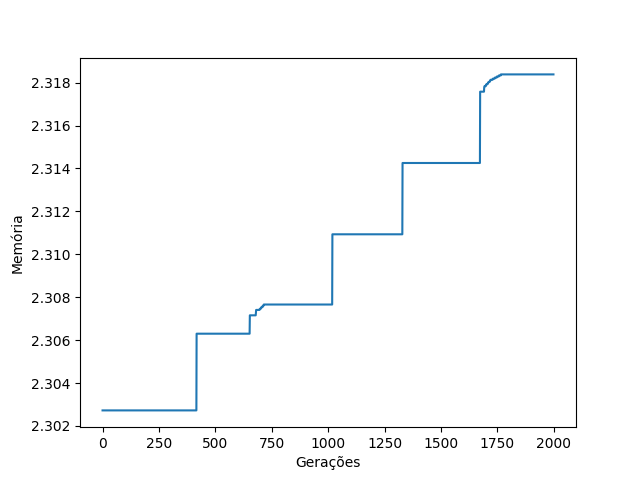

É verificado, através dos gráficos gerados pela execução de ambos algoritmos, que o algoritmo sexuado foi o que garantiu a maior variabilidade genética e, consequentemente, possibilitou que o “fitness” fosse o mais próximo do ideal do que o algoritmo genético assexuado.  É possível ratificar, então, que o item variabilidade genética é essencial para o estabelecimento de gerações consideradas mais aptas à seleção natural e a se aproximarem do objetivo proposto inicialmente.


Sobre o desempenho de recursos computacionais na execução dos algoritmos, segue abaixo:

**Consumo de CPU do Algoritmo Sexuado**

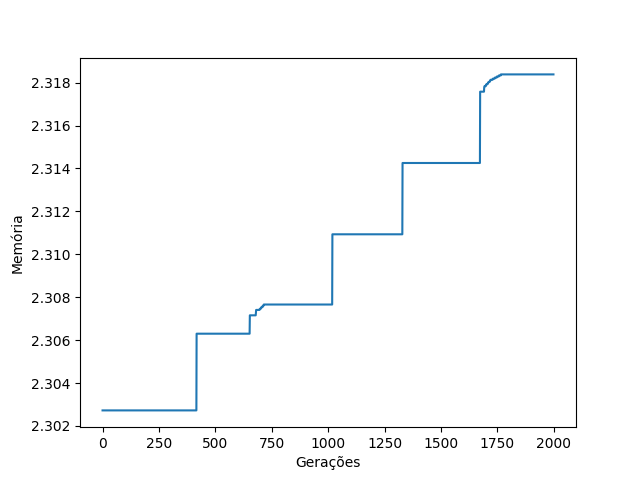

**Consumo de CPU do Algoritmo Assexuado**

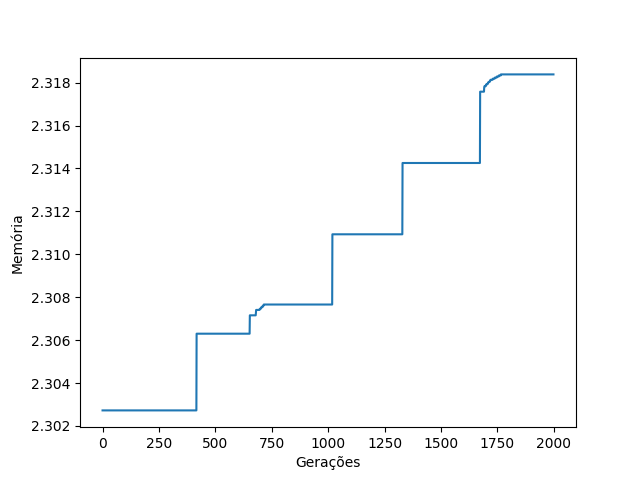

**Consumo de RAM do Algoritmo Sexuado**

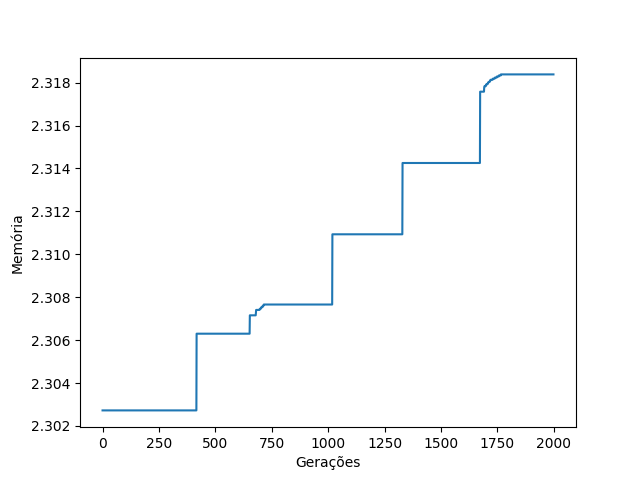



# 5 - Conclusão
...........